In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
import matplotlib.pyplot as plt

In [3]:
pima = pd.read_csv("D:/Dixant/CDAC/Machine Learning/16-12-21/diabetes.csv")

In [4]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
pima.shape

(768, 9)

In [6]:
print(pima.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


In [7]:
X_train, X_test, y_train, y_test = train_test_split(pima.loc[:, pima.columns !='Outcome'],pima['Outcome'], stratify=pima['Outcome'], random_state=42)

In [8]:
print(y_train.value_counts())
print(y_test.value_counts())

0    375
1    201
Name: Outcome, dtype: int64
0    125
1     67
Name: Outcome, dtype: int64


In [9]:
feature_name=list(X_train.columns)
class_name = list(y_train.unique())

In [10]:
class_name

[0, 1]

In [11]:
clf= DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
 
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [12]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.734375


[Text(2170.5216346153848, 1572.5571428571427, 'X[1] <= 132.5\ngini = 0.454\nsamples = 576\nvalue = [375, 201]'),
 Text(1149.8913461538461, 1456.0714285714284, 'X[7] <= 30.5\ngini = 0.325\nsamples = 397\nvalue = [316, 81]'),
 Text(809.9942307692307, 1339.5857142857142, 'X[5] <= 45.4\ngini = 0.192\nsamples = 241\nvalue = [215, 26]'),
 Text(648.4961538461538, 1223.1, 'X[0] <= 7.5\ngini = 0.163\nsamples = 235\nvalue = [214, 21]'),
 Text(445.68461538461537, 1106.6142857142856, 'X[6] <= 0.509\ngini = 0.144\nsamples = 231\nvalue = [213, 18]'),
 Text(160.24615384615385, 990.1285714285714, 'X[2] <= 19.0\ngini = 0.049\nsamples = 158\nvalue = [154, 4]'),
 Text(80.12307692307692, 873.6428571428571, 'X[5] <= 28.05\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(40.06153846153846, 757.1571428571428, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(120.18461538461538, 757.1571428571428, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(240.36923076923077, 873.6428571428571, 'X[4] <= 37.0\ngini =

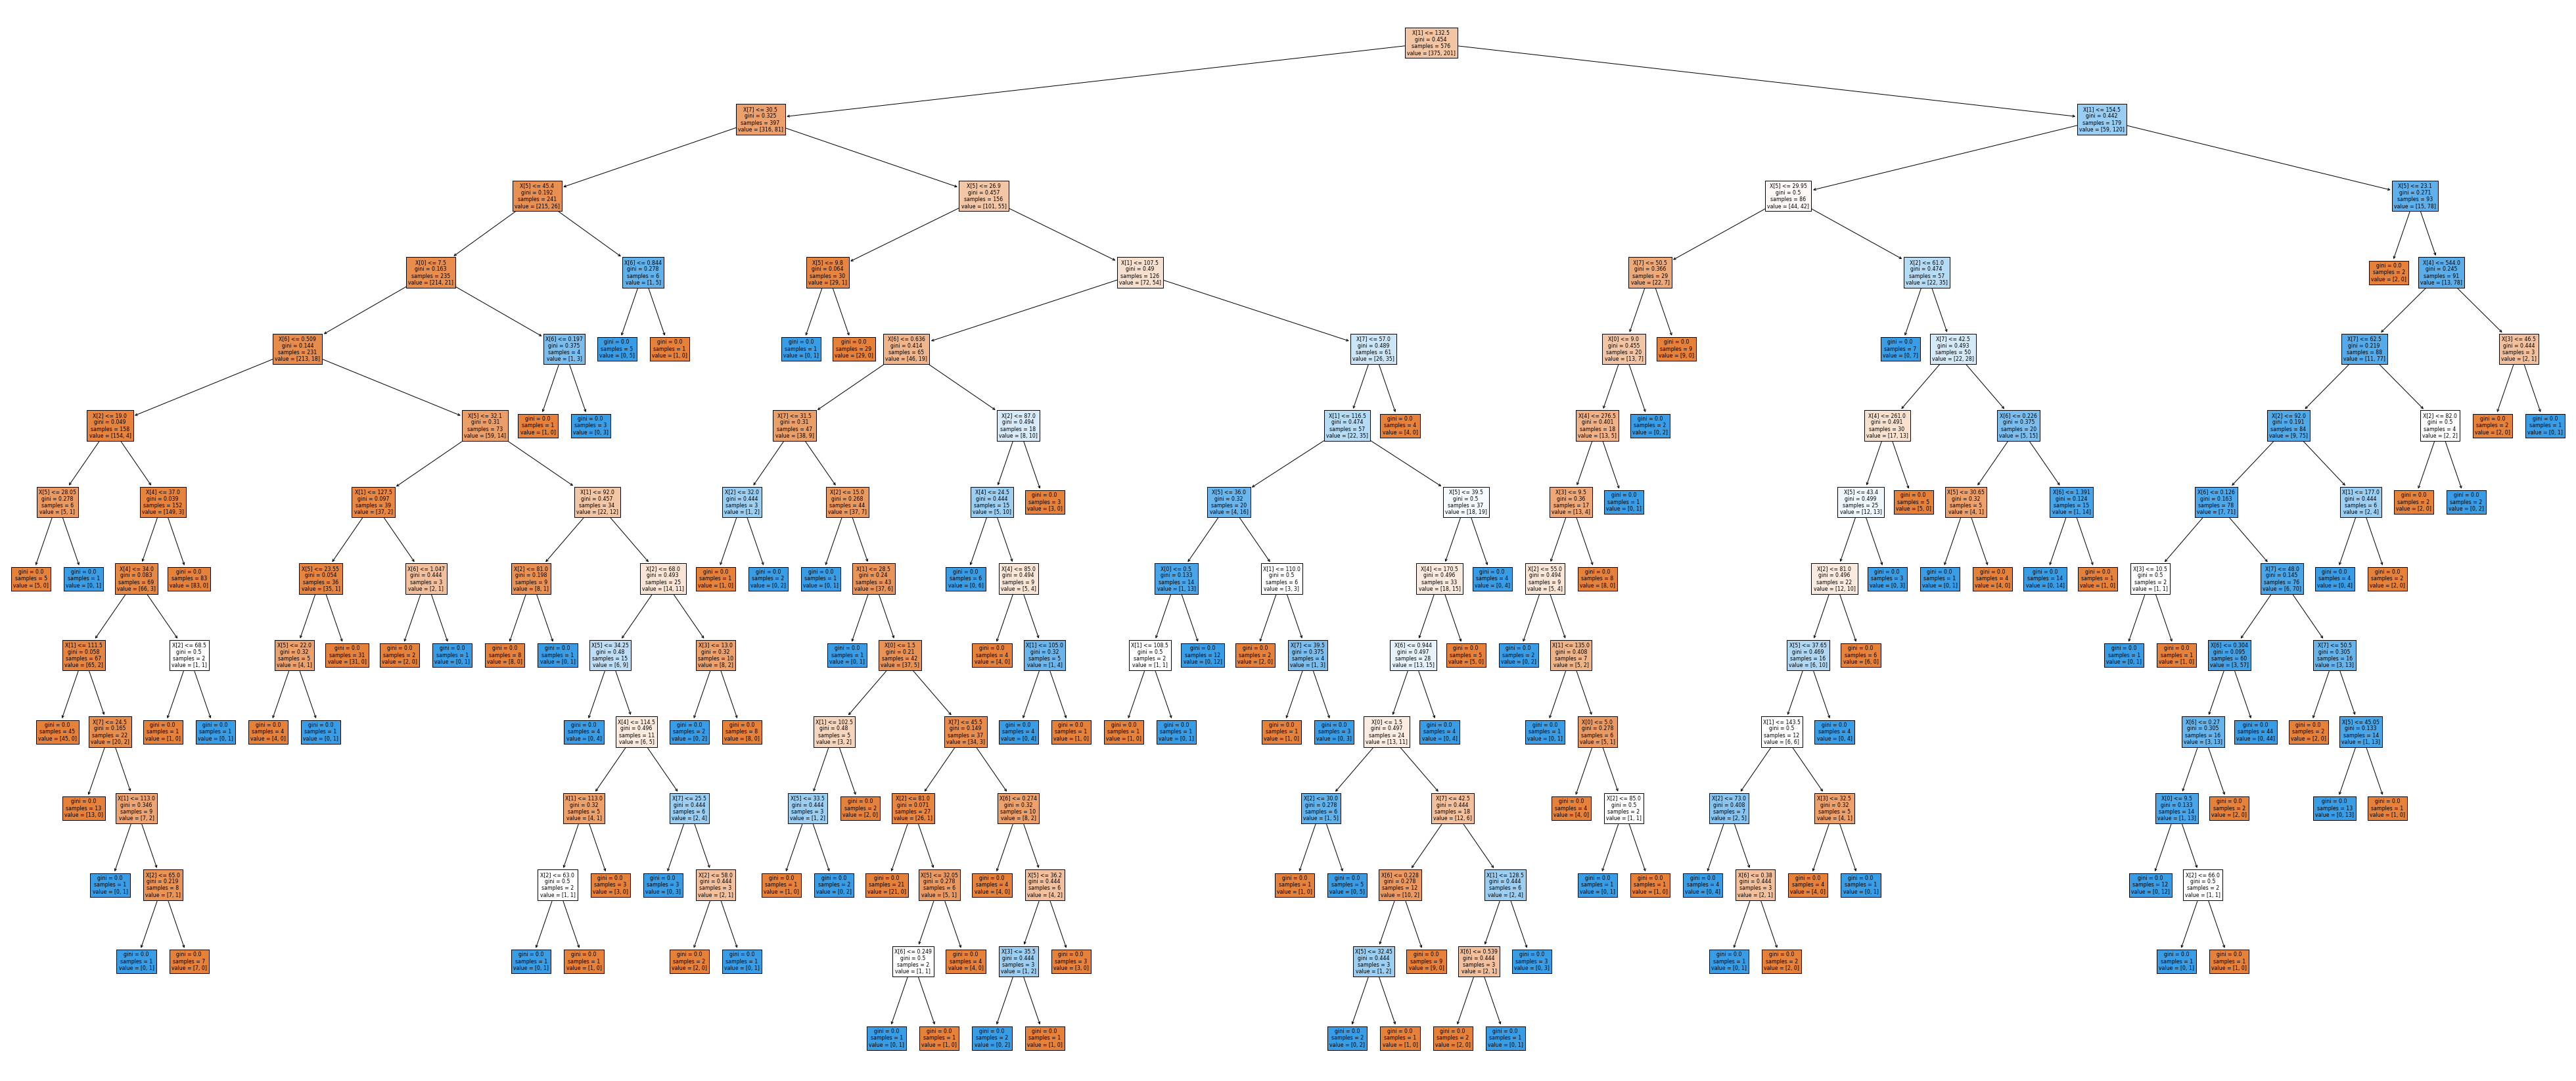

In [13]:
from sklearn import tree
plt.figure(figsize=(70,30))
tree.plot_tree(clf,filled=True)

In [14]:
pima['Insulin']=pima['Insulin'].replace(0,np.NaN)
pima['SkinThickness']=pima['SkinThickness'].replace(0,np.NaN)
pima['BloodPressure']=pima['BloodPressure'].replace(0,np.NaN)
pima['BMI']=pima['BMI'].replace(0.0,np.NaN)

In [15]:
pima['Insulin']=pima['Insulin'].replace(np.NaN,pima['Insulin'].mean())
pima['SkinThickness']=pima['SkinThickness'].replace(np.NaN,pima['SkinThickness'].mean())
pima['BloodPressure']=pima['BloodPressure'].replace(np.NaN,pima['BloodPressure'].mean())
pima['BMI']=pima['BMI'].replace(np.NaN,pima['BMI'].mean())

In [16]:
X_train, X_test, y_train, y_test = train_test_split(pima.loc[:, pima.columns !='Outcome'],pima['Outcome'], stratify=pima['Outcome'], random_state=42)

In [17]:
feature_name=list(X_train.columns)
class_name = list(y_train.unique())

In [18]:
clf= DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
 
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [19]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7083333333333334


In [20]:
pima = pd.read_csv("D:/Dixant/CDAC/Machine Learning/16-12-21/diabetes.csv")

In [21]:
clf= DecisionTreeClassifier(criterion='entropy')
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
 
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [22]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.671875


In [23]:
clf= DecisionTreeClassifier(criterion='entropy',max_depth=5)
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
 
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [24]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7552083333333334


In [40]:
list1=[]
for i in range(5,10):
    list1.append(i)

In [41]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth' : list1}

In [42]:
clf= DecisionTreeClassifier(criterion='entropy',max_depth=i)

In [43]:
gridsearch = GridSearchCV(clf, param_grid,cv=4)


In [44]:
gridsearch.fit(X_train,y_train)

GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=9),
             param_grid={'max_depth': [5, 6, 7, 8, 9]})

In [45]:
gridsearch.best_params_

{'max_depth': 6}

In [46]:
gridsearch.best_score_

0.7326388888888888

In [48]:
clf= DecisionTreeClassifier(criterion='entropy',max_depth=6)

clf = clf.fit(X_train,y_train)
 

y_pred = clf.predict(X_test)

In [49]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7447916666666666
